# 8 DECISION TREES

**WHAT IS A DECISION TREE?**

Beginning at the root node, which by convention is placed at the top of the decision tree diagram, attributes are tested at the decision nodes, with each possible outcome resulting in a branch. Each branch then leads either to another decision node or to a terminating leaf node.

<img src="./img/L08.01.01.png" style="width: 50%; box-shadow: 1px 1px 1px 1px grey;"> <br>

**REQUIREMENTS FOR USING DECISION TREES**

1. Decision tree algorithms represent <u> supervised learning, </u> and as such require preclassified target variables. A training data set must be supplied which provides the algorithm with the values of the target variable. 
2. This training data set should be <u> rich and varied, </u> providing the algorithm with a healthy cross section of the types of records for which classification may be needed in the future. Decision trees learn by example, and if examples are systematically <u> lacking for a definable subset of records,</u> classification and prediction for this subset will be <u> problematic or impossible.</u> 
3. The <u> target </u> attribute classes must be <u> discrete. </u> That is, one cannot apply decision tree analysis to a continuous target variable. <u> Rather, the target </u> variable must take on values that are <u> clearly demarcated </u> as either <u> belonging to a particular class or not belonging.</u>

Decision trees seek to create <u> a set of leaf nodes </u> that are as <u> pure </u> as possible, that is, where each of the records in a particular leaf node has the same classification.

Two of the many methods for measuring leaf node purity, which lead to constructing decision trees:
- Classification and regression trees (CART) algorithm
- C4.5 algorithm

<img src="./img/L08.02.01.png" style="width: 50%; box-shadow: 1px 1px 1px 1px grey;"> <br>

**CLASSIFICATION AND REGRESSION TREES**

The decision trees produced by CART are strictly binary, containing exactly two branches for each decision node.

<img src="./img/L08.03.01.png" style="width: 50%;"> <br>

Then the optimal split is whichever split maximizes this measure $Φ(s|t)$ over all possible splits at node t.
<img src="./img/L08.03.03.png" style="width: 50%;"> <br>
<img src="./img/L08.03.02.png" style="width: 50%;"> <br>
<img src="./img/L08.03.04.png" style="width: 50%;"> <br>
<img src="./img/L08.03.06.png" style="width: 30%;"> <br>

The maximum observed value for $Φ(s|t)$ among the candidate splits is therefore attained by split 4, with $Φ(s|t) = 0.6248$. CART therefore chooses to make the initial partition of the data set using candidate split 4, <u> assets = low versus assets ∈{medium,high}.</u> The <u> left child node </u> turns out to be a <u> terminal leaf node </u>, since both of the records that were passed to this node had bad credit risk. 

<img src="./img/L08.03.05.png" style="width: 50%;"> <br>

Here <u> two candidate </u> splits (3 and 7) share the highest value for $Φ(s|t), 0.4444$. We <u> arbitrarily select </u> the first split encountered, split 3, <u> savings = high versus savings ∈{low, medium},</u> for decision node A, with the resulting tree shown in Figure 8.3.

<img src="./img/L08.03.07.png" style="width: 30%;"> <br>

In general, CART would <u> recursively proceed </u> to visit each remaining decision node and apply the procedure above to find the optimal split at each node. <u> Eventually, no decision nodes remain </u>, and the <u> full tree </u> has been grown. However, <u> not all leaf nodes are necessarily homogeneous </u>, which leads to a certain level of <u> classification error </u>.

<img src="./img/L08.03.08.png" style="width: 30%;"> <br>

For example, suppose that since we <u> cannot further partition </u> the records in <u>Table 8.1 </u>, we <u>classify</u> the records contained in this leaf node as <u>bad credit risk</u>. 
Then the <u>probability</u> that a randomly chosen record <u>from this leaf node</u> would be classified <u>correctly is 0.6</u>, since three of the five records (60%) are actually classified as bad credit risks. Hence, <u>our classification error rate</u> for this particular leaf would be <u>0.4 or 40%</u>, since two of the five records are actually classified <u>as good credit risks</u>. 
CART would then calculate <u>the error rate for the entire decision tree</u> to be the <u>weighted average of the individual leaf error rates</u>, with the <u>weights equal to the proportion of records in each leaf.</u>

<img src="./img/L08.02.01.png" style="width: 50%"> <br>

<u>To avoid memorizing the training set</u>, the CART algorithm needs to begin <u>pruning nodes</u> and branches that would <u>otherwise reduce the generalizability</u> of the classification results. Even though <u>the fully grown tree</u> has the <u>lowest error rate</u> on the training set, the resulting model may be <u>too complex</u>, resulting in <u>overfitting</u>. As <u>each decision node is grown</u>, the subset of records available for analysis becomes <u>smaller and less representative of the overall population</u>. <u>Pruning the tree will increase the generalizability</u> of the results. an adjusted overall error rate is found that penalizes the decision tree for having too many leaf nodes and thus too much complexity

**C4.5 ALGORITHM**

The C4.5 algorithm is Quinlan’s extension of his own ID3 algorithm for generating decision trees.
- Unlike CART, the C4.5 algorithm is <u>not restricted to binary splits</u>. Whereas CART always produces a binary tree, C4.5 produces a tree of more variable shape.
- For <u>categorical attributes</u>, C4.5 by default produces <u>a separate branch for each value</u> of the categorical attribute. This may result in more <u>bushiness</u> than desired, since some values may have low frequency or may naturally be associated with other values.
- The C4.5 method <u>for measuring node homogeneity</u> is <u>quite different</u> from the CART method and is examined in detail below.

The C4.5 algorithm uses the concept of <u>information gain or entropy reduction</u> to select the optimal split. 

Suppose that we have a variable X whose k possible values have probabilities $p_1, p_2, … , p_k$.The entropy of X : 
$$ 
H(X) = −\sum_j p_j log_2(p_j)
$$

Suppose that we have a <u>candidate split S</u>, which partitions the <u>training data set T</u> into several subsets, $T_1, T_2, … , T_k$. 
The mean information requirement can then be calculated as the weighted sum of the entropies for the individual subsets, as follows:
$$
H_S(T) = −\sum_{i=1}^k p_i H_S(T_i)
$$
where $p_i$ represents the proportion of records in subset i.
We define information gain to be $$\text{gain}(S) = H(T) – H_S(T)$$

<img src="./img/L08.04.01.png" style="width: 50%"> <br>

Now, because five of the eight records are classified as good credit risk, with the remaining three records classified as bad credit risk, the entropy before splitting is

<img src="./img/L08.04.02.png" style="width: 50%"> <br>

For candidate splite 1 (saving):

$$H_{\text{High savings}} = −(1/2)\log_2(1/2) − (1/2)\log_2(1/2) = 1$$
$$H_{\text{Medium savings}} = −(3/3)\log_2(3/3) − (0/3)\log_2(0/3) = 0$$
By convention we define $\log_2(0)=0$
$$H_{\text{Low savings}} = −(1/3)\log_2(1/3) − (2/3)\log_2(2/3) = 0.9183$$
$$H_{\text{savings}}(T) = (2/8)(1) + (3/8)(0) + (3/8)(0.9183) = 0.5944$$ 

Then the information gain represented by the split on the savings attribute is calculated as $H(T) − H_{\text{savings}}(T) = 0.9544 − 0.5944 = 0.36$ bits.

<img src="./img/L08.04.03.png" style="width: 40%"> <br>

<img src="./img/L08.04.04.png" style="width: 30%"> <br>


**DECISION RULES**

The support of the decision rule refers to the proportion of records in the data
set that rest in that particular terminal leaf node. The confidence of the rule refers to
the proportion of records in the leaf node for which the decision rule is true. In this
small example, all of our leaf nodes are pure, resulting in perfect confidence levels of
100% = 1.00. In real-world examples, such as in the next section, one cannot expect
such high confidence levels.

<img src="./img/L08.05.01.png" style="width: 50%"> <br>


**EXERCISES**
5,6

------------
# Python Zone

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,0.524793,0.068627,382-4657,no,yes,0.490196,0.755701,0.666667,0.755701,...,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111,False.
1,OH,0.438017,0.068627,371-7191,no,yes,0.509804,0.460661,0.745455,0.460597,...,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111,False.
2,NJ,0.561983,0.068627,358-1921,no,no,0.000000,0.693843,0.690909,0.693830,...,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000,False.
3,OH,0.342975,0.000000,375-9999,yes,no,0.000000,0.853478,0.430303,0.853454,...,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222,False.
4,OK,0.305785,0.068627,330-6626,yes,no,0.000000,0.475200,0.684848,0.475184,...,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,0.789256,0.068627,414-4276,no,yes,0.705882,0.445268,0.466667,0.445171,...,0.741176,0.592688,0.688273,0.352113,0.688583,0.495,0.30,0.494444,0.222222,False.
3329,WV,0.276860,0.068627,370-3271,no,no,0.000000,0.658780,0.345455,0.658786,...,0.323529,0.421870,0.452125,0.633803,0.452481,0.480,0.20,0.479630,0.333333,False.
3330,RI,0.111570,1.000000,328-8230,no,no,0.000000,0.515393,0.660606,0.515426,...,0.341176,0.794241,0.453739,0.408451,0.454274,0.705,0.30,0.705556,0.222222,False.
3331,CT,0.756198,1.000000,364-6381,yes,no,0.000000,0.609464,0.636364,0.609490,...,0.494118,0.439016,0.311996,0.732394,0.312014,0.250,0.50,0.250000,0.222222,False.


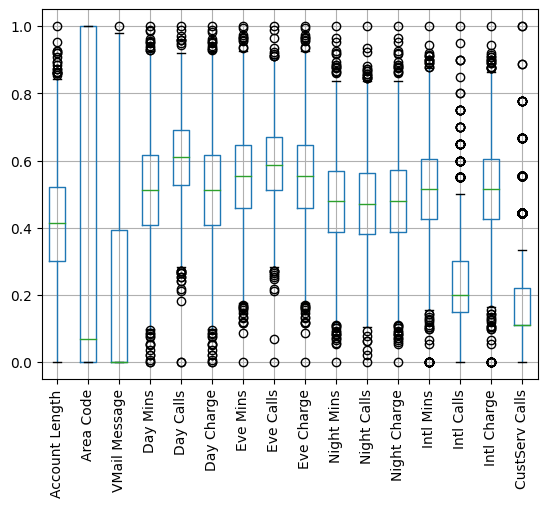

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename = "./data_sets/DKD2e_data_sets/churn.txt"
df = pd.read_csv(filename)
df.dropna(inplace=True)
for i in df.columns:
    if df[i].dtype == 'object': continue
    a,b = df[i].min(),df[i].max()
    df[i] = (df[i] - a)/(b - a)

df.select_dtypes(np.number).boxplot(rot=90);
df